<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-13/blob/binarios/Reto/Reto_Entrega_2_Clasificaci%C3%B3n_ensambles_y_presentacion_ejecutiva_JuanSebastianOrtegaBriones_A01794327.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

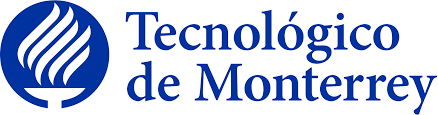

# Reto: Parte 2 Clasificación-ensambles y presentación ejecutiva
## Ciencia y analítica de datos
### Profesor: María de la Paz Rico Fernández
### Juan Sebastián Ortega Briones A01794327
### Equipo 13
**18 de Noviembre del 2022**

# Carga librerias y datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as color
import seaborn as sns
%matplotlib inline
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [ ]:
pd.set_option("display.max_columns", 57)
pd.set_option("display.max_rows", 100)

**Uso de Base de datos de Aguas Subterraneas**

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo-13/main/Reto/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv", encoding = 'ISO-8859-1')  #Importa datos de Aguas subterraneas

In [ ]:
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,NaN,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,NaN,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,NaN,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,NaN,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,<1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,<0.003,Potable - Excelente,0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,NaN,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [ ]:
df.shape

(1068, 57)

# Limpieza de datos

In [ ]:
#Array de solo las columnas numericas
datos_numericos=['ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L', 'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L', 'CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L']

In [ ]:
#Remplaza datos numericos que incluyen el simbolo < por 0
df.replace(to_replace=r'[<]\w+', value=0, regex=True, inplace=True)

In [ ]:
#La columna SDT_mg/L no contiene datos y la de CONTAMINANTES tiene muchos Nan seran eliminadas
df.drop(['SDT_mg/L','CONTAMINANTES'], axis=1, inplace=True)


In [ ]:
df.dropna(inplace=True)

In [ ]:
#Convierte columnas que contienen datos númericos de tipo objeto a tipo flotante
df[datos_numericos]=df[datos_numericos].astype('float')

In [ ]:
# Se crea un arreglo con los nombres de las calumnas que contienen categorias binarias
cat_binarias=[]
for n in df.columns:
  if 'CUMPLE_CON' in n:
    cat_binarias.append(n)

In [ ]:
# Cuantas columnas de categorias binarias existen
len(cat_binarias)

15

In [ ]:
# Se crea una copia del DataFrama para modificarlo y tener respaldo del original
ndf=df.copy()

In [ ]:
# Se cambian las palabras 'SI' y 'NO' por True y False para poder usar categorias binarias en el modelo
ndf[cat_binarias]=np.where(ndf[cat_binarias] == "SI", True, False)
ndf[cat_binarias].head(5)

,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,False,True,True,True,False,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True


In [ ]:
ndf.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.7320,Potable - Dura,0.0,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,0.0,Potable - Excelente,0.000,Potable - Excelente,0.0,Potable - Excelente,0.0,Potable - Excelente,0.0,Potable - Excelente,0.0891,Potable - Excelente,Verde,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,0.0,Potable - Excelente,5.750110,Potable - Buena calidad,0.0134,Apta como FAAP,0.0,Potable - Excelente,0.000,Potable - Excelente,0.0,Potable - Excelente,0.0,Potable - Excelente,0.0,Potable - Excelente,0.0000,Potable - Excelente,Verde,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,342.0,Excelente para riego,Potable - Dulce,1.8045,Alta,120.7190,Potable - Dura,0.0,Potable - Excelente,1.449803,Potable - Excelente,0.0370,No apta como FAAP,0.0,Potable - Excelente,0.000,Potable - Excelente,0.0,Potable - Excelente,0.0,Potable - Excelente,0.0,Potable - Excelente,0.0000,Potable - Excelente,Rojo,True,True,True,True,False,True,True,True,False,True,True,True,True,True,True
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.8790,Potable - Dura,0.0,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,0.0,Potable - Excelente,0.005,Potable - Excelente,0.0,Potable - Excelente,0.0,Potable - Excelente,0.0,Potable - Excelente,0.0000,Potable - Excelente,Verde,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,1179.0,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291.0,Aceptable,15.672251,No apta como FAAP,0.0000,Potable - Excelente,0.0,Potable - Excelente,0.000,Potable - Excelente,0.0,Potable - Excelente,0.0,Potable - Excelente,0.0,Potable - Excelente,0.0000,Potable - Excelente,Rojo,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True


# Clasificación

In [ ]:
# Se determinan las categorias del Semaforo
categorias=df['SEMAFORO'].unique()
categorias

array(['Verde', 'Rojo', 'Amarillo'], dtype=object)

In [ ]:
# Cambia la columna del semaforo de un string a categorico
y=df['SEMAFORO'].apply(lambda x: categorias.tolist().index(x))

In [ ]:
# Se crea 'X' , 'y' para usarlas en los clasificadores
X=ndf[cat_binarias].values
columnas=df[cat_binarias].columns

In [ ]:
columnas

Index(['CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='object')

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Se crea la insatancia del DecisionTreeClassifier y se alimenta el modelo
tree_clf = DecisionTreeClassifier(max_depth=6, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=6, random_state=42)

**Importancia de las variables**

In [ ]:
importancia_clf=pd.DataFrame(tree_clf.feature_importances_,columns=['importancia'])
importancia_clf['nombres']=columnas
importancia_clf.sort_values(by='importancia', ascending=False)

,importancia,nombres
4,0.257551,CUMPLE_CON_FLUO
5,0.213935,CUMPLE_CON_DUR
7,0.165225,CUMPLE_CON_NO3
6,0.122272,CUMPLE_CON_CF
8,0.121216,CUMPLE_CON_AS
14,0.101235,CUMPLE_CON_FE
10,0.018565,CUMPLE_CON_CR
0,0.000000,CUMPLE_CON_ALC
1,0.000000,CUMPLE_CON_COND
2,0.000000,CUMPLE_CON_SDT_ra


In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=str( "aguas_subterraneas.dot"), 
        feature_names=columnas,
        class_names=categorias,
        rounded=True,
        filled=True
    )

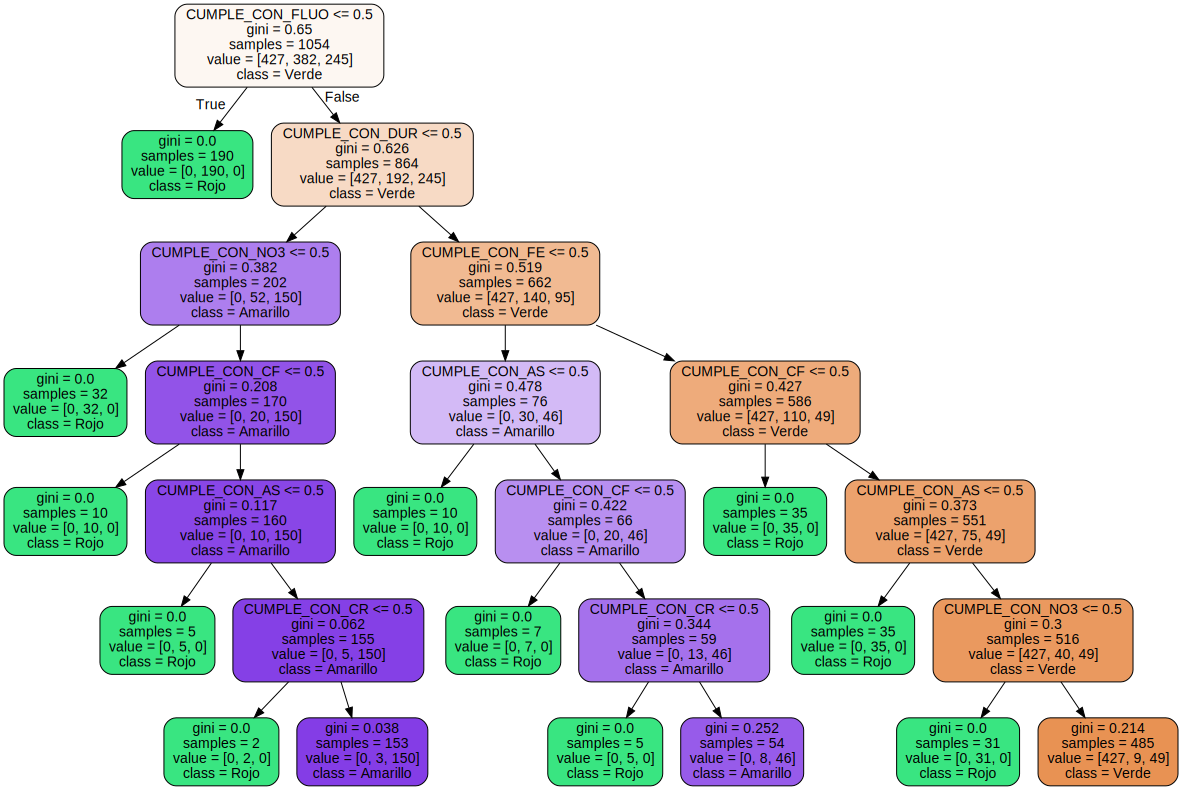

In [ ]:
from graphviz import Source

Source.from_file("aguas_subterraneas.dot")  

In [ ]:
!dot -Tpng {"aguas_subterraneas.dot"} -o {"aguas_subterraneas.png"}

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Se crea la insatancia del DecisionTreeRegressor y se alimenta el modelo
tree_reg = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=4, random_state=42)

**Importancia de las variables**

In [ ]:
importancia=pd.DataFrame(tree_reg.feature_importances_,columns=['importancia'])
importancia['nombres']=columnas
importancia.sort_values(by='importancia', ascending=False)

,importancia,nombres
5,0.436870,CUMPLE_CON_DUR
13,0.184908,CUMPLE_CON_MN
4,0.171373,CUMPLE_CON_FLUO
14,0.130756,CUMPLE_CON_FE
7,0.044050,CUMPLE_CON_NO3
6,0.024357,CUMPLE_CON_CF
8,0.007685,CUMPLE_CON_AS
0,0.000000,CUMPLE_CON_ALC
1,0.000000,CUMPLE_CON_COND
2,0.000000,CUMPLE_CON_SDT_ra


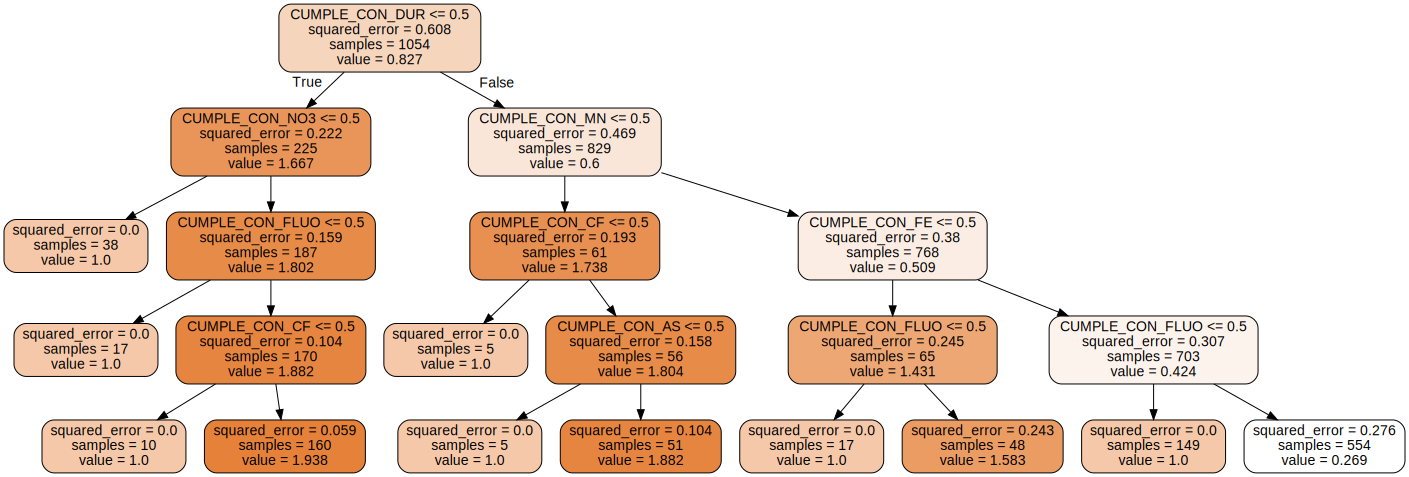

In [ ]:
export_graphviz(
    tree_reg,
    out_file=str("regression_tree.dot"),
    feature_names=columnas,
    rounded=True,
    filled=True
)

Source.from_file("regression_tree.dot")



In [ ]:
!dot -Tpng {"regression_tree.dot"} -o {"regression_tree.png"}

# Random Forest

In [ ]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


In [ ]:
# Se dividen los datos en entrenamiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print("Datos de entrenamiento: ", round((X_train.shape[0]/X.shape[0])*100,2),"%\t", y_train.shape[0])
print("Datos de prueba: \t", round((X_test.shape[0]/X.shape[0])*100,2),"%\t", y_test.shape[0])

Datos de entrenamiento:  74.95 %	 790
Datos de prueba: 	 25.05 %	 264


In [ ]:
# Se crean las instancias de los clasificadores para usarlos en el ensamble
log_clf=LogisticRegression(random_state=42, max_iter=10000)
rnd_clf=RandomForestClassifier(random_state=42)
svm_clf=SVC(probability=True,random_state=42)

In [ ]:
# Se crea la instancia clasificadora 
voting_clf=VotingClassifier(estimators=[('lr',log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='soft')

In [ ]:
# Se alimenta el modelo
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=10000,
                                                 random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [73]:
# Determinacion de la eficiencia de los diferentes clasificadores
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred=clf.predict(X_test)
  print(clf.__class__.__name__,round(accuracy_score(y_test, y_pred),3))

LogisticRegression 0.977
RandomForestClassifier 0.992
SVC 0.996
VotingClassifier 0.996


In [ ]:
prueba=pd.DataFrame({'test':y_test.values.tolist(), 'pred':y_pred.tolist()} )
prueba

,test,pred
0,1,1
1,2,2
2,0,0
3,2,2
4,0,0
...,...,...
259,1,1
260,1,1
261,1,1
262,1,1


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Reporte de clasificación

In [ ]:
print(classification_report(y_test, y_pred, target_names=categorias))

              precision    recall  f1-score   support

       Verde       1.00      1.00      1.00       115
        Rojo       1.00      0.99      0.99        88
    Amarillo       0.98      1.00      0.99        61

    accuracy                           1.00       264
   macro avg       0.99      1.00      1.00       264
weighted avg       1.00      1.00      1.00       264



# Matrix de confusión

In [ ]:
cf_matrix=confusion_matrix(y_test, y_pred)
cf_matrix

array([[115,   0,   0],
       [  0,  87,   1],
       [  0,   0,  61]])

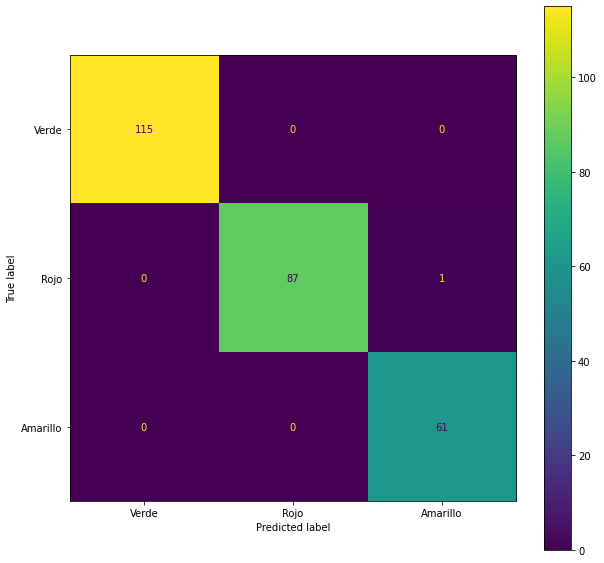

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=categorias)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()
